In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import bibliotek

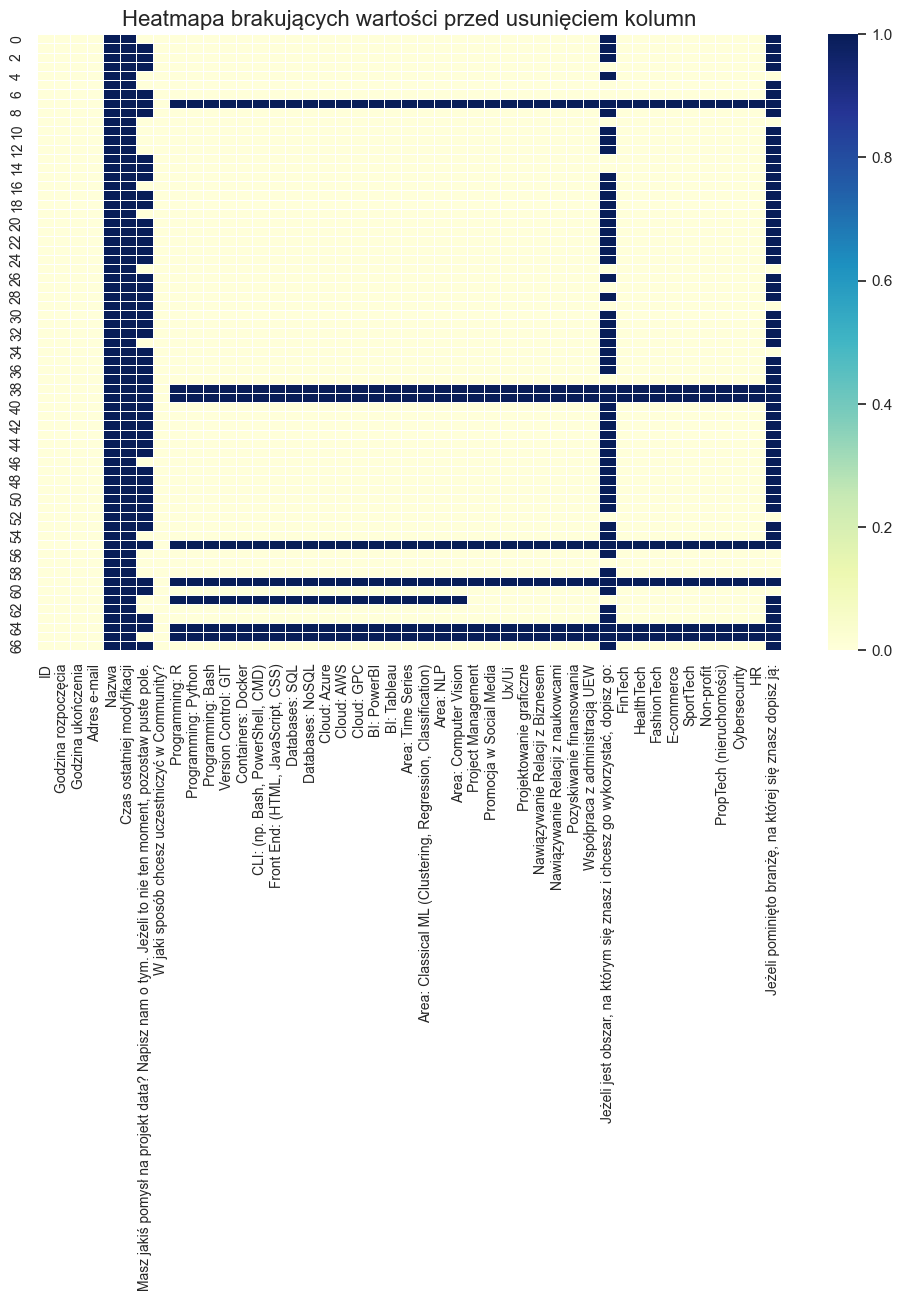

In [5]:
# Wczytanie danych z pliku Excel
file_path = r"C:\Users\xbots\Projekt-people-analytics\data\01_Raw\DataCompetencySurvey.xlsx"
data = pd.read_excel(file_path)

# Zmiana typu danych w kolumnie ID na tekstowy
data['ID'] = data['ID'].astype(str)

# Ustawienie stylu wykresów
sns.set(style="whitegrid", context="notebook")

# Heatmapa brakujących wartości przed usunięciem kolumn
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmapa brakujących wartości przed usunięciem kolumn', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Usunięcie niepotrzebnych kolumn
data_cleaned = data.drop(['Godzina rozpoczęcia','Godzina ukończenia','Adres e-mail','Nazwa','Czas ostatniej modyfikacji',
                                   'Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.',],axis=1)

# Zmiana nazw kolumn dla łatwiejszej obsługi
data_cleaned.rename(columns={
    "ID": "Participant ID",
    "W jaki sposób chcesz uczestniczyć w Community?": "Community Participation"
}, inplace=True)


# Zapis wyfiltrowanych danych do pliku CSV
output_file_path = os.path.join(os.path.dirname(r"C:\Users\xbots\Projekt-people-analytics\data\02_Interim\."), 'Selected_Features.csv')
data_cleaned.to_csv(output_file_path, index=False)
